In [7]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 
import numpy as np 

def cosine_similarity(item1,item2):
    items = [item1, item2]
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer() 
    sparse_matrix = count_vectorizer.fit_transform(items) #change items

    from sklearn.metrics.pairwise import cosine_similarity
    return cosine_similarity(sparse_matrix)[0][1] #get value from the matrix

cat = input("Input Category (bath/fashion/tech/schoolsup/toys): ")

l_file = "./data/" + cat + "/lazada.csv"
s_file = "./data/" + cat + "/shopee.csv"
try:
    lazada = pd.read_csv(l_file)
    shopee = pd.read_csv(s_file)
except:
    print("Category Error.")

shopee["Price"] = shopee["Price"].replace(",","",regex=True)
shopee["Price"] = shopee['Price'].astype(float)
lazada["Price"] = lazada["Price"].replace(",","",regex=True)
lazada["Price"] = lazada['Price'].astype(float)

items_comparison = []
for index1, row1 in lazada.iterrows():
    templist = []
    for index2, row2 in shopee.iterrows():
        if cosine_similarity(row1['Product'],row2['Product']) >= 0.4:
            templist.append((row1['Product'],row1["Price"],row2['Product'],row2['Price'],cosine_similarity(row1['Product'],row2['Product'])))
        else:
            templist.append((row1['Product'],row1["Price"],"NO SIMILAR PRODUCT FOUND",float(0.00),0))
    templist.sort(key=lambda x:x[4],reverse=True)
    items_comparison.append(templist[0])


items_df = pd.DataFrame(items_comparison,columns=['Lazada',"Lazada Price",'Shopee',"Shopee Price",'Cosine Similarity'])
items_df["Price Difference"] = items_df["Lazada Price"] - items_df['Shopee Price']
row_idx = items_df["Shopee"].str.contains("NO SIMILAR PRODUCT FOUND")
col_idx = ["Shopee","Price Difference"]
no_counterpart = items_df.loc[row_idx,col_idx]
no_counterpart['Price Difference'] = "N/A"
items_df.update(no_counterpart)

o_file = "./output/" + cat + ".csv"
items_df.to_csv(o_file,index=False)




Input Category (bath/fashion/tech/schoolsup/toys): schoolsup


In [25]:
tech = pd.read_csv("./output/tech.csv")
tech.name = "tech"
schoolsup = pd.read_csv("./output/schoolsup.csv")
schoolsup.name = "schoolsup"
toys = pd.read_csv("./output/toys.csv")
toys.name = "toys"
bath = pd.read_csv("./output/bath.csv")
bath.name = "bath"
fashion = pd.read_csv("./output/fashion.csv")
fashion.name = "fashion"

cat_list = [tech,schoolsup,toys,bath,fashion]

average_list = []
for i in cat_list:
    
    ave_cos = i['Cosine Similarity'].mean()
    ave_diff = i['Price Difference'].mean()
    ave_laz = i['Lazada Price'].mean()
    ave_sho = i['Shopee Price'].mean()
    ave_price = (ave_laz + ave_sho)/2
    average_list.append((i.name,ave_cos,ave_diff,ave_price))
    
cat_summary = pd.DataFrame(average_list,columns=['Category','Average Cosine Similarity','Average Price Difference','Average Similar Product Price'])
cat_summary = cat_summary.set_index('Category')
cat_summary.to_csv("./output/summary.csv",index=True)

cat_summary




,Average Cosine Similarity,Average Price Difference,Average Similar Product Price
Category,,,
tech,0.612667,-189.751477,4314.954901
schoolsup,0.857689,131.316458,130.288960
toys,0.732140,215.806047,382.101931
bath,0.426509,117.631786,177.860495
fashion,0.468792,158.353437,161.764208


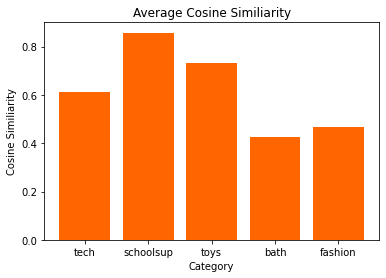

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.bar(x=cat_summary['Category'],height=cat_summary['Average Cosine Similarity'],color='#FF6600')
plt.xlabel("Category")
plt.ylabel("Cosine Similiarity")
plt.title("Average Cosine Similiarity")
plt.savefig("./output/images/cos_sim_ave.png")



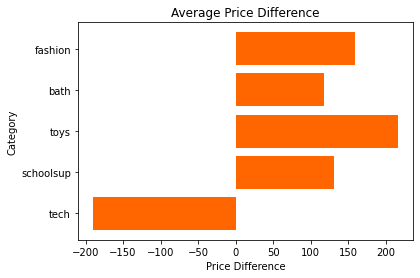

In [11]:
plt.barh(y=cat_summary['Category'],width=cat_summary['Average Price Difference'],color='#FF6600')
plt.xlabel("Price Difference")
plt.ylabel('Category')
plt.title("Average Price Difference")
plt.savefig("./output/images/price_diff_ave.png")

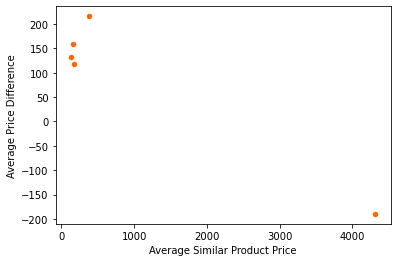

In [21]:
cat_summary.plot.scatter(x='Average Similar Product Price',y='Average Price Difference',color='#FF6600')
plt.savefig("./output/images/scatter_price.png")
